In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# for Sankey diagram
import holoviews as hv
import plotly.graph_objects as go
import plotly.express as pex

In [2]:
df = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')
#, parse_dates=['date'], index_col='date')
df

,date,year,month,mc,v_flow_mean,v_loss_cover,v_rainfall_total,v_temperature_mean
0,2000-01,2000,1,7,230.40,0.000000,334.00,NaN
1,2000-02,2000,2,7,272.40,0.000133,400.00,NaN
2,2000-03,2000,3,7,321.60,0.000265,319.00,NaN
3,2000-04,2000,4,7,310.80,0.000398,248.00,NaN
4,2000-05,2000,5,7,410.00,0.000531,302.00,NaN
...,...,...,...,...,...,...,...,...
11515,2019-08,2019,8,33,2.13,0.026338,64.80,NaN
11516,2019-09,2019,9,33,1.92,0.026394,4.00,NaN
11517,2019-10,2019,10,33,3.36,0.026450,144.27,NaN
11518,2019-11,2019,11,33,5.60,0.026507,273.98,NaN


# Ejemplo para el año 2000

In [3]:
year = 2000
df_year = df[df.year==year]
df_year = df_year.drop(columns='year')
df_year

,date,month,mc,v_flow_mean,v_loss_cover,v_rainfall_total,v_temperature_mean
0,2000-01,1,7,230.40,0.000000,334.00,NaN
1,2000-02,2,7,272.40,0.000133,400.00,NaN
2,2000-03,3,7,321.60,0.000265,319.00,NaN
3,2000-04,4,7,310.80,0.000398,248.00,NaN
4,2000-05,5,7,410.00,0.000531,302.00,NaN
...,...,...,...,...,...,...,...
11287,2000-08,8,33,2.83,0.002030,91.12,NaN
11288,2000-09,9,33,1.70,0.002320,24.76,NaN
11289,2000-10,10,33,1.57,0.002610,138.90,NaN
11290,2000-11,11,33,2.24,0.002900,285.10,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8CA5036D0>,
      dtype=object)

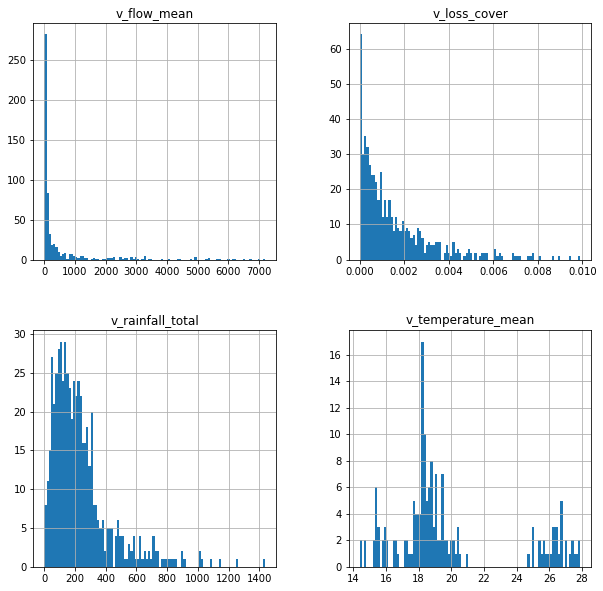

In [4]:
df_year[['v_flow_mean', 'v_loss_cover', 'v_rainfall_total', 'v_temperature_mean']].hist(bins=100, figsize=[10,10])


Las variables inicialmente no están normalizadas entonces la escala es muy diferente entre cuencas. 

Ahora normalizamos por cuenca cada variable:

In [5]:
df_norm = pd.concat([df_year[['month', 'mc']], 
                     df_year[['mc', 'v_flow_mean', 'v_loss_cover', 'v_rainfall_total', 'v_temperature_mean']].groupby('mc').transform(lambda x: (x - x.mean()) / x.std())], 
                    axis = 1)
df_norm

,month,mc,v_flow_mean,v_loss_cover,v_rainfall_total,v_temperature_mean
0,1,7,-0.555536,-1.525426,1.064392,NaN
1,2,7,0.117841,-1.248075,1.657217,NaN
2,3,7,0.906655,-0.970725,0.929659,NaN
3,4,7,0.733500,-0.693375,0.291922,NaN
4,5,7,2.323954,-0.416025,0.776961,NaN
...,...,...,...,...,...,...
11287,8,33,-0.686449,0.416025,-0.954518,NaN
11288,9,33,-0.971891,0.693375,-1.392976,NaN
11289,10,33,-1.004730,0.970725,-0.638823,NaN
11290,11,33,-0.835485,1.248075,0.327159,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8CBF45610>,
      dtype=object)

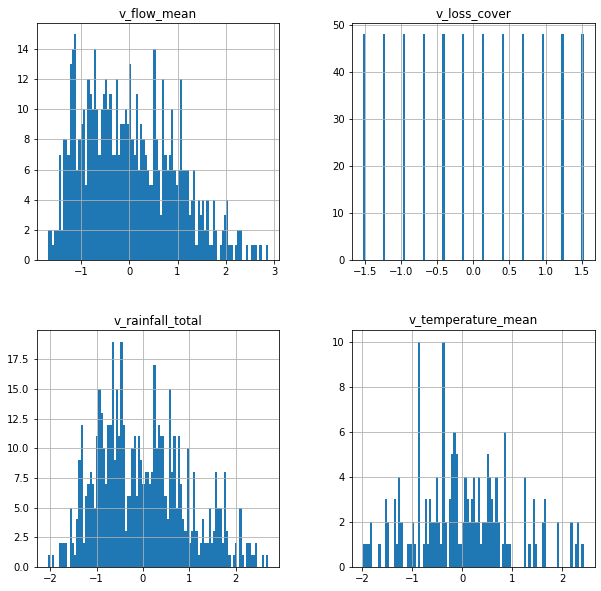

In [6]:
df_norm[['v_flow_mean', 'v_loss_cover', 'v_rainfall_total', 'v_temperature_mean']].hist(bins=100, figsize=[10,10])

Pasamos de formato long a wide cada variable para este año, es decir, cada variable queda como 12 columnas, una por mes

In [7]:
df_wide = df_norm.pivot(index='mc',columns='month')[['v_flow_mean','v_loss_cover', 'v_rainfall_total']]
#temperature not used (too many NAs)
df_wide.head()

v_flow_mean                                                              \
month          1         2         3         4         5         6         7    
mc                                                                              
1       -0.447072 -0.759100 -0.366549 -0.517530  1.757253  0.166918  0.227311   
2       -0.229491 -0.669189 -0.078178  1.231124  1.912923  1.303220 -0.429759   
3       -0.713179 -0.770076 -0.069650  0.010791  2.543703  0.536601  0.036297   
4        1.242212  1.185764 -0.038717 -0.390430  0.907868  0.530102 -1.471621   
5        0.061329  0.793974  0.872731  0.704627  1.767523  0.728453 -0.636900   

                                     ... v_rainfall_total                      \
month        8         9         10  ...               3         4         5    
mc                                   ...                                        
1      1.958562  0.327965 -0.567857  ...         1.110394  0.229340 -0.760066   
2     -1.244178 -0.934432 -0.392375  ...         0.770116  1.127357  0.977999   
3      0.978045 -0.238380 -0.671977  ...         0.872762  0.965235 -0.297711   
4     -1.623596 -0.559773 -0.368719  ...        -0.234044 -0.783580 -0.456113   
5     -0.237817 -0.615059 -1.204749  ...         0.952823  1.569582  0.349520   

                                                                             
month        6         7         8         9         10        11        12  
mc                                                                           
1     -0.692675 -0.969269 -0.883414 -1.176599 -0.504841  0.071031  0.385024  
2      0.620590 -0.058878 -1.783341 -1.326641 -1.368252 -0.394298  0.680468  
3      0.336438 -0.690187 -1.704825 -0.962256 -0.711165 -0.555224  0.246854  
4      0.226511  0.072409 -1.297982 -1.625887  1.438203 -0.146486  1.745093  
5      0.785177 -1.570283 -0.925489 -0.673179  0.714530 -1.570283 -0.050532  

[5 rows x 36 columns]

# k-means

In [8]:
k = 8

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_wide)


# Iterative procedure to learn labels  
labels = kmeans.predict(df_wide)
centroids = kmeans.cluster_centers_

# get the cluster id for each basin
y_km = kmeans.fit_predict(df_wide)
print(y_km)

#count number of basins per cluster
np.unique(y_km, return_counts=True)

[4 0 4 6 4 4 0 0 7 0 0 1 2 5 5 5 4 5 0 2 3 7 1 6 6 6 6 7 5 3 3 3 3 7 7 1 0
 0 1 7 7 1 5 5 1 1 1 1]


(array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9, 2, 5, 5, 7, 5, 7], dtype=int64))

# Hierarchical clustering

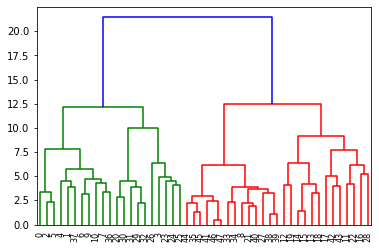

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_wide, method='ward'))# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')# save clusters for chart
y_hc = hc.fit_predict(df_wide)

# Procedure for all years

In [10]:
def get_cluster_id(k, year):
    #filter by year
    df_year = df[df.year==year]
    df_year = df_year.drop(columns='year')

    #normalize per basin
    df_norm = pd.concat([df_year[['month', 'mc']], 
                         df_year[['mc', 'v_flow_mean', 'v_loss_cover', 'v_rainfall_total', 'v_temperature_mean']].groupby('mc').transform(lambda x: (x - x.mean()) / x.std())], 
                        axis = 1)
    df_wide = df_norm.pivot(index='mc',columns='month')[['v_flow_mean','v_loss_cover', 'v_rainfall_total']]

    #clustering
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_wide)

    # get the cluster id for each basin
    y_km = kmeans.fit_predict(df_wide)
    
    return y_km
    

In [18]:
df_clusters = pd.DataFrame(index = pd.Series(range(1,49)), data = get_cluster_id(k = 4, year = 2000), columns = ['cluster2000'])

for year in range(2001, 2020):
    df_clusters['cluster'+str(year)] = get_cluster_id(k = k, year = 2000)

df_clusters

,cluster2000,cluster2001,cluster2002,cluster2003,cluster2004,cluster2005,cluster2006,cluster2007,cluster2008,cluster2009,cluster2010,cluster2011,cluster2012,cluster2013,cluster2014,cluster2015,cluster2016,cluster2017,cluster2018,cluster2019
1,3,4,4,4,1,6,6,5,7,4,3,0,5,7,0,4,4,3,1,6
2,3,2,4,4,1,3,6,0,3,4,2,5,5,0,4,4,6,3,1,4
3,3,4,4,4,1,6,6,5,7,4,3,0,5,7,0,4,4,3,1,6
4,2,0,5,0,4,4,3,2,6,3,4,4,4,3,6,0,3,7,4,5
5,3,2,4,4,1,3,0,0,3,0,2,5,5,7,4,4,6,3,1,4
6,3,4,4,4,1,6,6,5,7,4,3,0,5,7,0,4,4,3,1,6
7,3,2,4,4,1,3,0,0,3,0,2,5,3,0,4,4,6,3,3,4
8,3,2,3,6,6,3,0,0,4,0,2,5,3,0,4,1,6,0,3,4
9,1,5,2,3,5,7,5,1,0,1,1,2,2,1,1,3,2,1,6,3
10,3,2,3,6,6,3,0,0,3,0,2,5,3,0,4,4,6,0,3,4


In [19]:
df_clusters.to_csv('../temp/clustering.csv')